# TP Clustering 2022-2023

packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des données

In [4]:
PATH = 'data/'
DATA = 'auto-mpg.csv'
HEADER = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
numerical_features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
nominal_features = ['car_name']

In [5]:
dataset = pd.read_csv(PATH+DATA, sep=',', na_values='?', header=None, names=HEADER)

Rapide description des données importées

In [14]:
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Information sur les données

Des détails sur les données sont données dans le fichier `auto-mpg.names`.  
Les echantillons ici sont des voitures, les attributs correspondent principalement aux nom du modèle, l'année de production, les chevaux, le poids ...  

Dans la première partie, il s'agit d'étudier la consommation des voitures, elle est ici en mpg (miles per gallon)

## Répartition des valeurs pour car name

In [8]:

print(dataset['car name'].value_counts().sort_values())

audi 4000                       1
chevrolet nova custom           1
amc ambassador brougham         1
buick electra 225 custom        1
chrysler new yorker brougham    1
                               ..
chevrolet chevette              4
ford maverick                   5
amc matador                     5
toyota corolla                  5
ford pinto                      6
Name: car name, Length: 305, dtype: int64


On voit 305 valeurs pour l'attribut 'car name'  
Chaque valeurs contient 1 à 6 voitures  
Voici l'histogramme de la classe 'car name'

<AxesSubplot:xlabel='car name', ylabel='Count'>

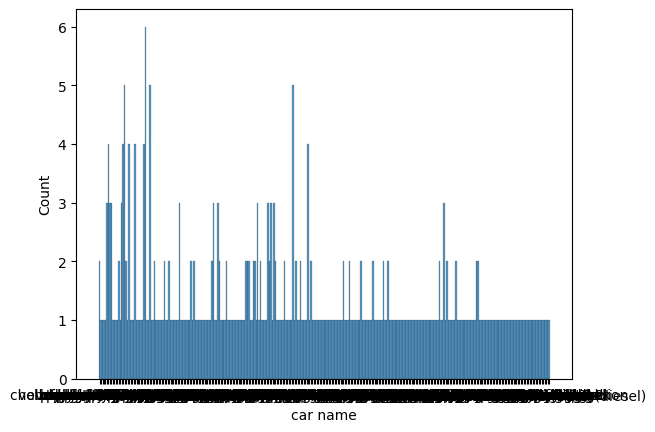

In [9]:
sns.histplot(dataset, x='car name')

On pouvait s'attendre à ne pas lire les données vu le nombre de valeurs
Voyant la répartition des classes par rapport aux nombre de voitures

In [11]:
nb_valeurs = {'1 voiture': 0, '2 voitures': 0, '3 voitures': 0, '4 voitures': 0, '5 voitures': 0, '6 voitures': 0}

for value_counts in dataset['car name'].value_counts():
    if value_counts == 1:
        nb_valeurs['1 voiture'] += 1
    else:
        nb_valeurs[f'{value_counts} voitures'] += 1

nb_valeurs

{'1 voiture': 249,
 '2 voitures': 34,
 '3 voitures': 12,
 '4 voitures': 6,
 '5 voitures': 3,
 '6 voitures': 1}

Pour résumer, la classe `car name` a 305 valeurs  
249 valeurs ne contienne qu'un seul échantillon.

Cette attribut contient beaucoup de valeurs uniques, il est difficile d'utiliser cette attribut dans les algorithmes.

## Boxplot

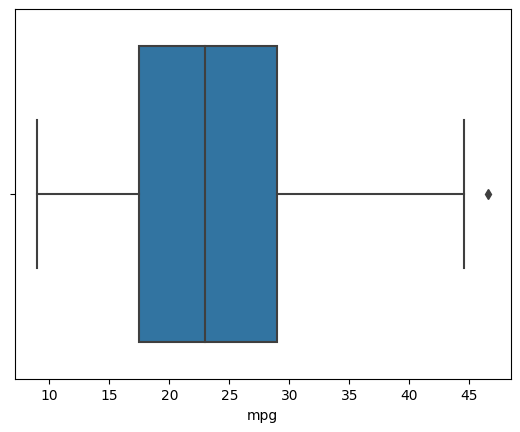

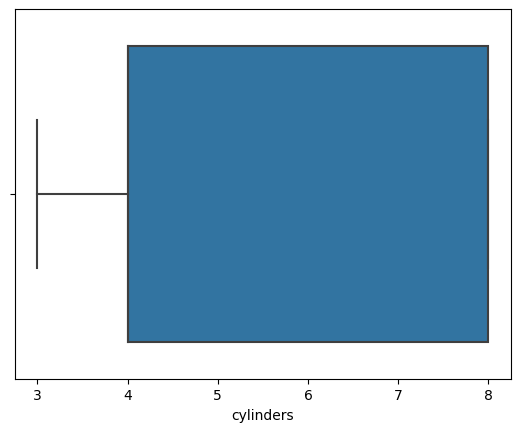

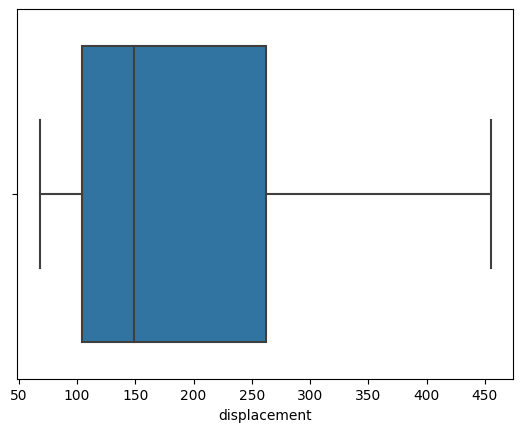

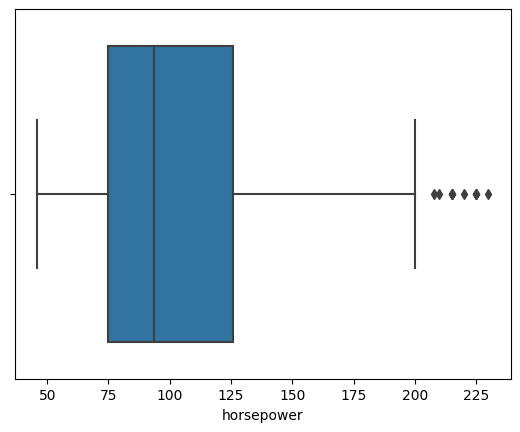

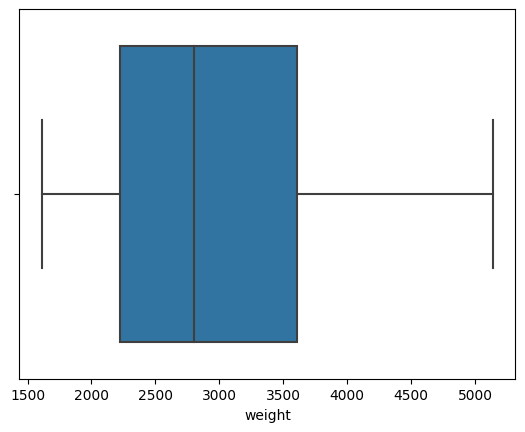

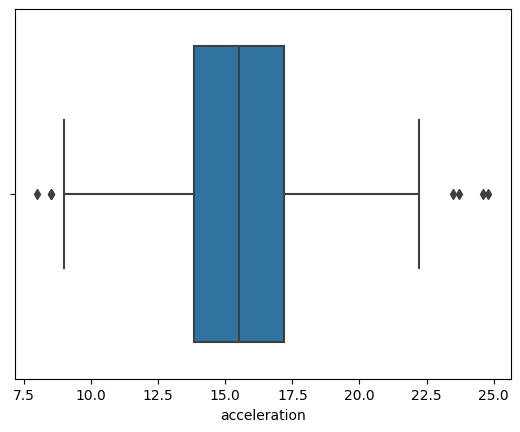

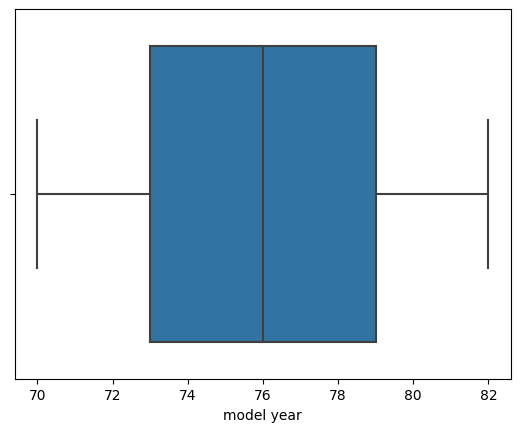

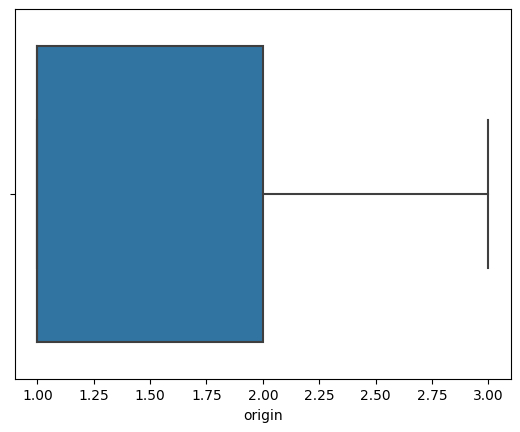

In [14]:
for feature in numerical_features:
    sns.boxplot(x=dataset[feature])
    plt.show()

La plupart des attributs semble correctement répartis sauf `cylinders` et `origin`.